# Text Analytics Assignment 1
# Contents
# Section 1- Build the wordcloud and alternate presentations to derive the insights from the given text data
# Section 2- Build word frequency analysis on National day speech data 
# Section 3- Build word frequency analysis on any speech data 

# ********************************************************

# Section-1
# Build the wordcloud and alternate presentations to derive the insights from the text data set. 
# Objective - Analyze "Swami Vivekananda's" speech

In [1]:
import os

with open(os.getcwd()+ "/Swami Vivekananda's Chicago speech.txt", 'r') as fh: 
    filedata = fh.read()

## Read Data set

In [2]:
#Print first 500 characters in the file
print("Data read from file : ", filedata[0:500] )

Data read from file :  Sisters and Brothers of America,
It fills my heart with joy unspeakable to rise in response to the warm and cordial welcome which you have given us. I thank you in the name of the most ancient order of monks in the world; I thank you in the name of the mother of religions, and I thank you in the name of millions and millions of Hindu people of all classes and sects.
My thanks, also, to some of the speakers on this platform who, referring to the delegates from the Orient, have told you that these


In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [5]:
corpus=PlaintextCorpusReader(os.getcwd(),"Swami Vivekananda's Chicago speech.txt")
print(corpus)

<PlaintextCorpusReader in 'C:\\Users\\gauth'>


In [6]:
print("Files in this corpus : ", corpus.fileids())

Files in this corpus :  ["Swami Vivekananda's Chicago speech.txt"]


In [7]:
paragraphs=corpus.paras()
print("\n Total paragraphs in this corpus : ", len(paragraphs))


 Total paragraphs in this corpus :  1


In [8]:
sentences=corpus.sents()
print("\n Total sentences in this corpus : ", len(sentences))
print("\n The first sentence : ", sentences[0])


 Total sentences in this corpus :  37

 The first sentence :  ['Sisters', 'and', 'Brothers', 'of', 'America', ',', 'It', 'fills', 'my', 'heart', 'with', 'joy', 'unspeakable', 'to', 'rise', 'in', 'response', 'to', 'the', 'warm', 'and', 'cordial', 'welcome', 'which', 'you', 'have', 'given', 'us', '.']


In [9]:
#Extract words from the corpus
print("\n Words in this corpus : ",corpus.words() )


 Words in this corpus :  ['Sisters', 'and', 'Brothers', 'of', 'America', ',', ...]


In [10]:
#Find the frequency distribution of words in the corpus
course_freq_dist=nltk.FreqDist(corpus.words())

#Print most commonly used words
print("Top 10 words in the corpus : ", course_freq_dist.most_common(10))

#find the distribution for a specific word
print("\n Distribution for \"delighted\" : ",course_freq_dist.get("delighted"))

Top 10 words in the corpus :  [('the', 70), (',', 53), ('of', 45), ('to', 38), ('and', 37), ('.', 30), ('in', 18), ('I', 16), ('a', 13), ('that', 12)]

 Distribution for "delighted" :  None


In [11]:
token_list = nltk.word_tokenize(filedata)
print("Token List : ",token_list[:20])
print("\n Total Tokens : ",len(token_list))

Token List :  ['Sisters', 'and', 'Brothers', 'of', 'America', ',', 'It', 'fills', 'my', 'heart', 'with', 'joy', 'unspeakable', 'to', 'rise', 'in', 'response', 'to', 'the', 'warm']

 Total Tokens :  1013


In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [13]:
wordcloud = WordCloud().generate(filedata)

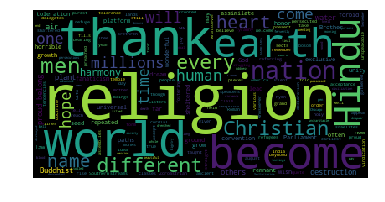

In [14]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
def wordfreq(tokens):
    word_freq = {}
    for tok in token_list:
        if tok.lower() in word_freq:
            word_freq = tok.lower.append()
        else:
            word_freq = tok.lower()
    return word_freq

<FreqDist with 402 samples and 1013 outcomes>
[('the', 70), (',', 55), ('of', 45), ('to', 38), ('and', 37), ('.', 34), ('in', 18), ('I', 16), ('a', 13), ('that', 12), ('this', 11), ('is', 11), ('which', 10), ('has', 10), ('all', 9), ('with', 8), ('not', 8), ('their', 8), ('you', 7), ('have', 7), ('or', 7), ('it', 7), ('world', 6), ('from', 6), ('earth', 6)]


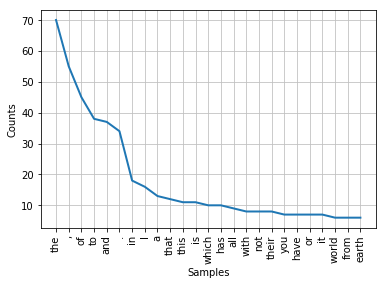

In [16]:
import nltk
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(token_list)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Removing Punctuation

In [17]:
#Use the Punkt library to extract tokens
token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))
print("Token List after removing punctuation : ",token_list2[:20])
print("\nTotal tokens after removing punctuation : ", len(token_list2))

Token List after removing punctuation :  ['Sisters', 'and', 'Brothers', 'of', 'America', 'It', 'fills', 'my', 'heart', 'with', 'joy', 'unspeakable', 'to', 'rise', 'in', 'response', 'to', 'the', 'warm', 'and']

Total tokens after removing punctuation :  902


In [18]:
def comment(tokens):
    comment_words = ' '
    for word in tokens:
        comment_words = comment_words + word + ' '
    return comment_words

In [19]:
cleaned_text = comment(token_list2)

In [20]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(cleaned_text)

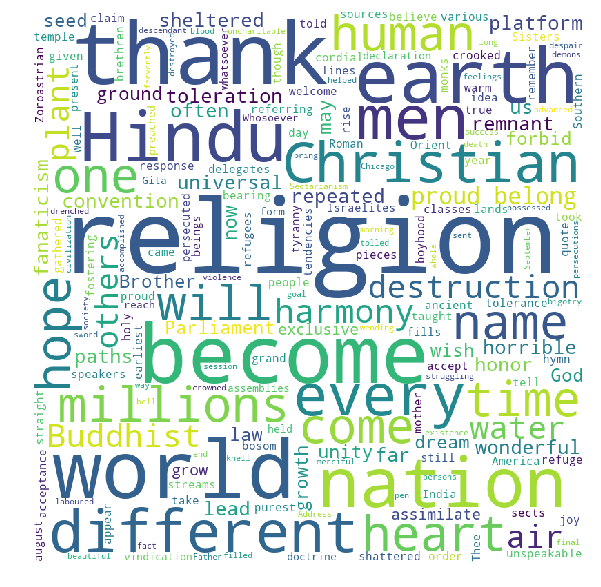

In [21]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Normalization

In [22]:
token_list3=[word.lower() for word in token_list2 ]
print("Token list after converting to lower case : ", token_list3[:20])
print("\nTotal tokens after converting to lower case : ", len(token_list3))

Token list after converting to lower case :  ['sisters', 'and', 'brothers', 'of', 'america', 'it', 'fills', 'my', 'heart', 'with', 'joy', 'unspeakable', 'to', 'rise', 'in', 'response', 'to', 'the', 'warm', 'and']

Total tokens after converting to lower case :  902


<FreqDist with 380 samples and 902 outcomes>
[('the', 74), ('of', 45), ('to', 38), ('and', 37), ('in', 19), ('i', 16), ('a', 14), ('that', 12), ('it', 11), ('this', 11), ('is', 11), ('which', 10), ('has', 10), ('my', 9), ('all', 9), ('with', 8), ('not', 8), ('their', 8), ('you', 7), ('have', 7), ('world', 7), ('religions', 7), ('or', 7), ('from', 6), ('earth', 6)]


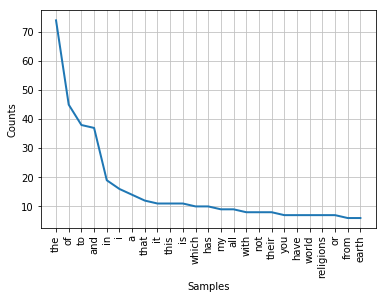

In [23]:
Freq_dist_nltk=nltk.FreqDist(token_list3)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [24]:
#Word Cloud Function calling
Normalized_text = comment(token_list3)

In [25]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(Normalized_text)

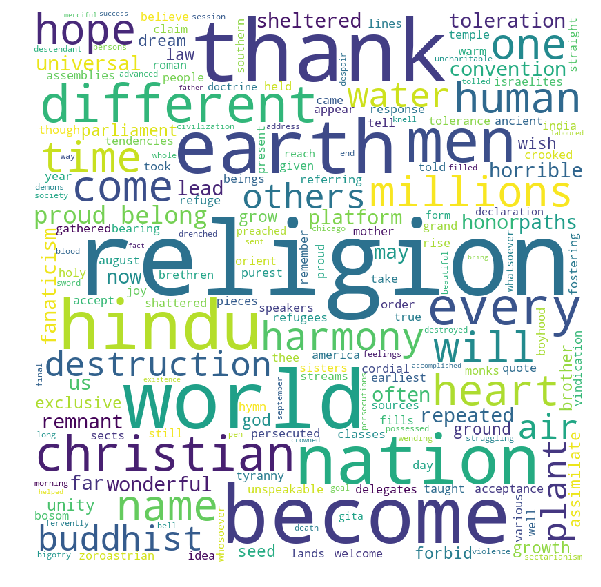

In [26]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Stop Word Removal

In [27]:
#Download the standard stopword list
nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords
token_list4 = list(filter(lambda token: token not in stopwords.words('english'), token_list3))
print("Token list after removing stop words : ", token_list4[:20])
print("\nTotal tokens after removing stop words : ", len(token_list4))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Token list after removing stop words :  ['sisters', 'brothers', 'america', 'fills', 'heart', 'joy', 'unspeakable', 'rise', 'response', 'warm', 'cordial', 'welcome', 'given', 'us', 'thank', 'name', 'ancient', 'order', 'monks', 'world']

Total tokens after removing stop words :  414


<FreqDist with 303 samples and 414 outcomes>
[('world', 7), ('religions', 7), ('earth', 6), ('become', 6), ('hindu', 5), ('thanks', 5), ('religion', 5), ('men', 4), ('different', 4), ('proud', 4), ('every', 4), ('christian', 4), ('thank', 3), ('name', 3), ('millions', 3), ('nations', 3), ('belong', 3), ('human', 3), ('one', 3), ('would', 3), ('time', 3), ('harmony', 3), ('destruction', 3), ('others', 3), ('buddhist', 3)]


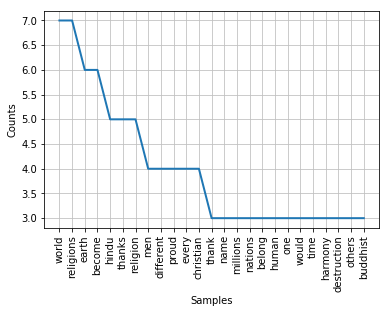

In [28]:
#Frequncy Distribution after stop word removal
Freq_dist_nltk=nltk.FreqDist(token_list4)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [29]:
#Word Cloud Function calling
Stop_word = comment(token_list4)

In [30]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(Stop_word)

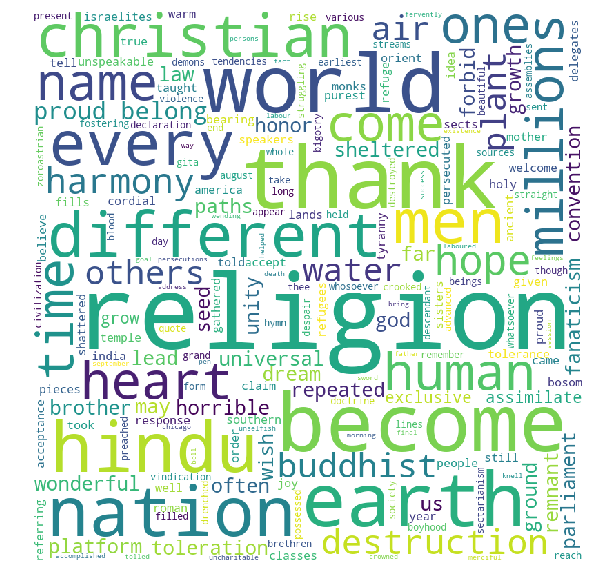

In [31]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Stemming

In [32]:
#Use the PorterStemmer library for stemming.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#Stem data
token_list5 = [stemmer.stem(word) for word in token_list4 ]
print("Token list after stemming : ", token_list5[:20])
print("\nTotal tokens after Stemming : ", len(token_list5))

Token list after stemming :  ['sister', 'brother', 'america', 'fill', 'heart', 'joy', 'unspeak', 'rise', 'respons', 'warm', 'cordial', 'welcom', 'given', 'us', 'thank', 'name', 'ancient', 'order', 'monk', 'world']

Total tokens after Stemming :  414


<FreqDist with 282 samples and 414 outcomes>
[('religion', 12), ('thank', 8), ('world', 7), ('becom', 7), ('earth', 6), ('hindu', 5), ('nation', 5), ('men', 4), ('differ', 4), ('proud', 4), ('everi', 4), ('christian', 4), ('heart', 3), ('name', 3), ('million', 3), ('toler', 3), ('belong', 3), ('human', 3), ('one', 3), ('come', 3), ('would', 3), ('time', 3), ('hope', 3), ('dream', 3), ('harmoni', 3)]


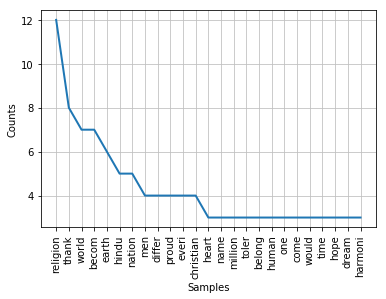

In [33]:
#Frequncy Distribution after stop word removal
Freq_dist_nltk=nltk.FreqDist(token_list5)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

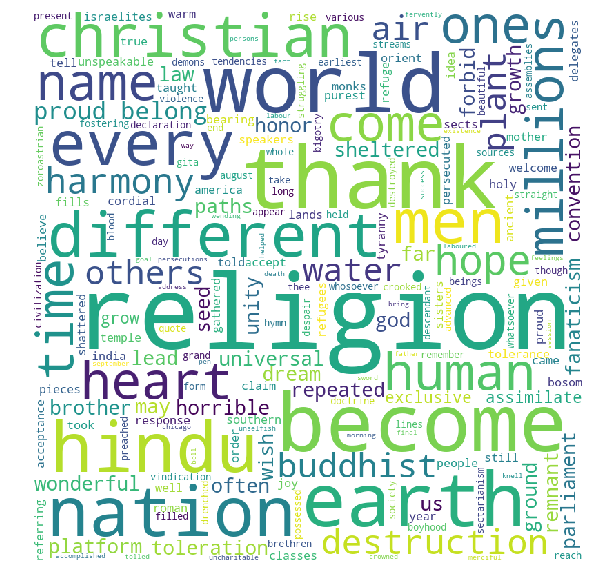

In [34]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Lemmatization

In [35]:
#Use the wordnet library to map words to their lemmatized form
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
token_list6 = [lemmatizer.lemmatize(word) for word in token_list4 ]
print("Token list after Lemmatization : ", token_list6[:20])
print("\nTotal tokens after Lemmatization : ", len(token_list6))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Token list after Lemmatization :  ['sister', 'brother', 'america', 'fill', 'heart', 'joy', 'unspeakable', 'rise', 'response', 'warm', 'cordial', 'welcome', 'given', 'u', 'thank', 'name', 'ancient', 'order', 'monk', 'world']

Total tokens after Lemmatization :  414


<FreqDist with 295 samples and 414 outcomes>
[('religion', 12), ('world', 7), ('earth', 6), ('become', 6), ('hindu', 5), ('thanks', 5), ('nation', 5), ('men', 4), ('different', 4), ('proud', 4), ('every', 4), ('christian', 4), ('brother', 3), ('heart', 3), ('thank', 3), ('name', 3), ('million', 3), ('belong', 3), ('human', 3), ('one', 3), ('come', 3), ('would', 3), ('time', 3), ('hope', 3), ('harmony', 3)]


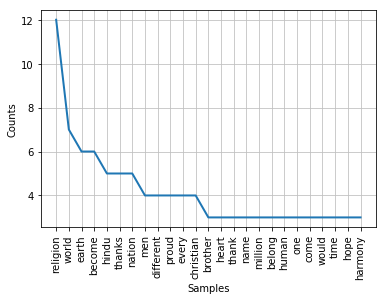

<FreqDist with 295 samples and 414 outcomes>
[('religion', 12), ('world', 7), ('earth', 6), ('become', 6), ('hindu', 5), ('thanks', 5), ('nation', 5), ('men', 4), ('different', 4), ('proud', 4), ('every', 4), ('christian', 4), ('brother', 3), ('heart', 3), ('thank', 3), ('name', 3), ('million', 3), ('belong', 3), ('human', 3), ('one', 3), ('come', 3), ('would', 3), ('time', 3), ('hope', 3), ('harmony', 3)]


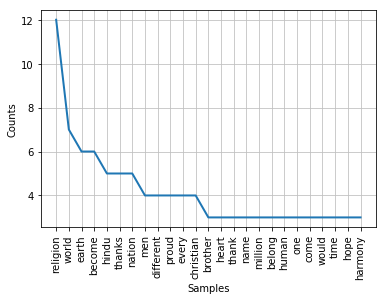

In [36]:
#Frequncy Distribution after stop word removal
Freq_dist_nltk=nltk.FreqDist(token_list6)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)
#Frequncy Distribution after stop word removal
Freq_dist_nltk=nltk.FreqDist(token_list6)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [37]:
Lemmatized_text = comment(token_list6)

In [38]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(Lemmatized_text)

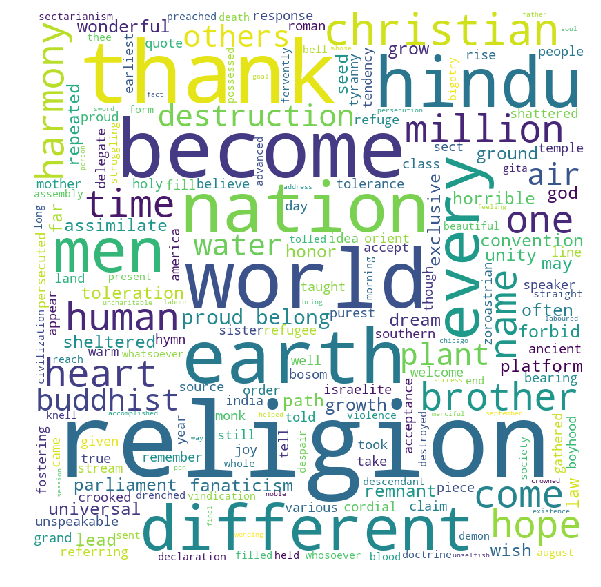

In [39]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# Analysis of Swami Vivekananda Speech-

## As per the word frequency distribution chart and word cloud of Vivekanada Speech after normalization,Stop word removal, Lemmatization and Stemming.The most widely frequenntly used words are
## religion,world,earth, thank, nation, hindu, world, brother, human, christian, buddhist, brother, heart, harmony

# Conclusion from Swami Vivekananda speech Analysis
## -He is participating in a world religion speech (ref words-religion, world, thank, nation)
## -He is representing his religion hindu (ref words  - hindu (since he referred this religion more in his speech))
## -He respects all other religions on earth with same equal respect (ref words - earth, brother, human, christian, buddhist, brother, heart, harmony)


## Section 2

## •	Build word frequency analysis on National day speech data (take from google), discussed in the session 1

## •	Build a wordcloud for the given data

## •	Compare the results from different tools (Word cloud, Frequency table, Frequency bar chart)



In [75]:
#defining function for plot world cloud
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [76]:
#Modi's independence day speech
#url : https://indianexpress.com/article/india/prime-minister-modi-independence-day-speech-red-fort-5308847/
from urllib.request import urlopen
response = urlopen('https://indianexpress.com/article/india/prime-minister-modi-independence-day-speech-red-fort-5308847/')
html = response.read()
print(len(html))
tokens = [tok for tok in html.split()]

284984


In [77]:
#We clean it a bit
from bs4 import BeautifulSoup
print("Calling BS4")
soup = BeautifulSoup(html, 'html.parser')
#adding all the paragraphs to text
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text 

Calling BS4


In [78]:
# Clearing the text data
import re
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
clean_text = text.lower()
clean_text = re.sub(r"i'm", "i am", clean_text)
clean_text = re.sub(r"he's", "he is", clean_text)
clean_text = re.sub(r"she's", "she is", clean_text)
clean_text = re.sub(r"that's", "that is", clean_text)
clean_text = re.sub(r"what's", "what is", clean_text)
clean_text = re.sub(r"where's", "where is", clean_text)
clean_text = re.sub(r"how's", "how is", clean_text)
clean_text = re.sub(r"\'ll", " will", clean_text)
clean_text = re.sub(r"\'ve", " have", clean_text)
clean_text = re.sub(r"\'re", " are", clean_text)
clean_text = re.sub(r"\'d", " would", clean_text)
clean_text = re.sub(r"n't", " not", clean_text)
clean_text = re.sub(r"won't", "will not", clean_text)
clean_text = re.sub(r"can't", "cannot", clean_text)
clean_text = re.sub(r"ltd", "", clean_text)
clean_text = re.sub(r"“", "", clean_text)
clean_text = re.sub(r"”", "", clean_text)
clean_text = re.sub(r"’", "", clean_text)
clean_text = re.sub(r"‘", "", clean_text)
clean_text = re.sub(r"–", "", clean_text)

clean_text = re.sub(r"2019", "", clean_text)
clean_text = re.sub(r"125", "", clean_text)
clean_text = re.sub(r"[-()%\"#/@;:<>{}`+=~|.!?,]", "", clean_text)

In [79]:
 print(tokens[0:100])

[b'<!DOCTYPE', b'HTML', b'PUBLIC', b'"-//W3C//DTD', b'HTML', b'4.01//EN""http://www.w3.org/TR/html4/strict.dtd">', b'<html', b'lang="en_IN"', b'lang="en"', b'class="">', b'<head>', b'<meta', b'charset="UTF-8">', b'<meta', b'name="viewport"', b'content="width=device-width,', b'initial-scale=1">', b'<meta', b'name="viewport"', b'content="width=device-width,', b'initial-scale=1.0"', b'/>', b'<meta', b'http-equiv="X-UA-Compatible"', b'content="IE=Edge">', b'<link', b'rel="profile"', b'href="https://gmpg.org/xfn/11">', b'<meta', b'name="description"', b'content="The', b'prime', b'minister,', b'who', b'addressed', b'the', b'nation', b'from', b'the', b'ramparts', b'of', b'Red', b'Fort', b'on', b'72nd', b'Independence', b'Day,', b'devoted', b'maximum', b'time', b'of', b'speech', b'in', b'presenting', b'the', b'report', b'card', b'of', b'his', b'government."', b'/><meta', b'name="news_keywords"', b'content="pm', b'modi', b'speech,', b'modi', b'speech,', b'modi', b'independence', b'day', b'speec

In [86]:
clean_text

'©  the indian express  all rights reservedmaking a pitch for retaining power in  prime minister narendra modi on wednesday presented a picture of rising india and contrasted it with what he termed as policy paralysis during the upa rule the prime minister devoted maximum time of the 72nd independence day speech in presenting the report card of his government this was modis fifth speech at red fort after nda came to power in 2014 when  crore people move towards achieving a goal there is nothing that cannot happen in 2014 the people of the country did not just stop at forming the government they moved together towards nationbuilding and are continuing to do so he said the pm said also said that he was an impatient agent of changehere is the full text of his speechmy dear countrymen i convey my best wishes to all of you on this auspicious occasion of independence day today the country is brimming with selfconfidence the country is scaling new heights by working extremely hard with a reso

In [81]:
# Word counts 
word2count = {}
for word in nltk.word_tokenize(clean_text):
    if word not in stop_words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [82]:
#word2count
# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()

In [83]:
#Get the token
tokens = [tok for tok in soup.get_text().split()]

Freq_dist_nltk
<FreqDist with 2658 samples and 8644 outcomes>
sorted_d[:25]
[('the', 501), ('of', 293), ('to', 250), ('and', 224), ('in', 162), ('is', 134), ('a', 133), ('have', 100), ('are', 90), ('our', 85), ('we', 79), ('that', 78), ('for', 75), ('with', 62), ('has', 56), ('I', 54), ('country', 53), ('this', 53), ('The', 49), ('will', 48), ('on', 44), ('from', 43), ('be', 42), ('it', 40), ('new', 39)]
-----Plot-----


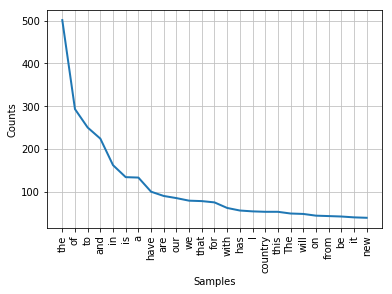

In [84]:
#Plot frequency distributions, using nltk
Freq_dist_nltk=nltk.FreqDist(tokens)
print("Freq_dist_nltk")
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print("sorted_d[:25]")
print(sorted_d[:25])
print("-----Plot-----")
Freq_dist_nltk.plot(25, cumulative=False)

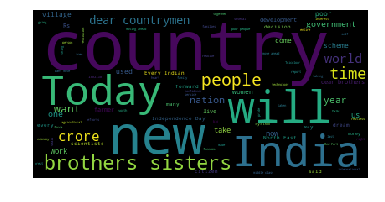

In [85]:
#Plot the word cloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(soup.get_text())
plot_wordcloud(wordcloud)

## Section 3
## Karnatka CM Speech

Calling BS4
<FreqDist with 482 samples and 813 outcomes>
[('-', 22), ('in', 19), ('Duration:', 18), ('the', 17), ('|', 16), ('Loading...', 13), ('to', 13), ('views', 13), ('Kannada', 13), ('Karnataka', 10), ('Sign', 10), ('Yeddyurappa', 9), ('NDTV', 8), ('of', 8), ('BS', 7), ('is', 7), ('News', 7), ('and', 6), ('viewsNew', 6), ('Speech', 5), ('Assembly', 5), ('video', 5), ('this', 5), ('a', 5), ('on', 5)]


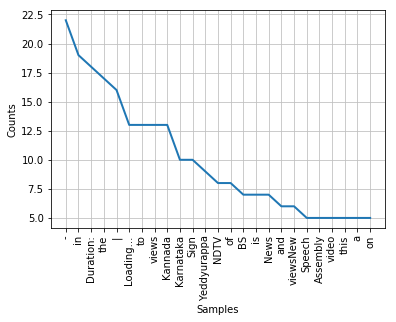

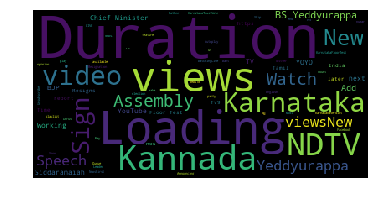

In [116]:
#Yeddyurappa speech 
from urllib.request import urlopen 
response = urlopen('https://www.youtube.com/watch?v=Bge3NgFc1jk') 
html = response.read() 
#We clean it a bit 
from bs4 import BeautifulSoup 
print("Calling BS4") 
soup = BeautifulSoup(html, 'html.parser') 
# kill all script and style elements 
for script in soup(["script", "style"]):    
    script.extract()      
#Get the token 
tokens = [tok for tok in soup.get_text().split()] 
#Plot frequency distributions 
Freq_dist_nltk=nltk.FreqDist(tokens) 
print(Freq_dist_nltk) 
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True) 
print(sorted_d[:25]) 
Freq_dist_nltk.plot(25,cumulative=False) 
#Plot the word cloud 
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(soup.get_text()) 
plot_wordcloud(wordcloud)